In [2]:
%matplotlib inline

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def draw_neural_net(ax, left, right, bottom, top, layer_sizes, labels=False):
    '''
    Draw a neural network cartoon using matplotilb.
    
    :usage:
        >>> fig = plt.figure(figsize=(12, 12))
        >>> draw_neural_net(fig.gca(), .1, .9, .1, .9, [4, 7, 2])
    
    :parameters:
        - ax : matplotlib.axes.AxesSubplot
            The axes on which to plot the cartoon (get e.g. by plt.gca())
        - left : float
            The center of the leftmost node(s) will be placed here
        - right : float
            The center of the rightmost node(s) will be placed here
        - bottom : float
            The center of the bottommost node(s) will be placed here
        - top : float
            The center of the topmost node(s) will be placed here
        - layer_sizes : list of int
            List of layer sizes, including input and output dimensionality
    '''
    n_layers = len(layer_sizes)
    v_spacing = (top - bottom)/float(max(layer_sizes))
    h_spacing = (right - left)/float(len(layer_sizes) - 1)
    # Nodes
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing*(layer_size - 1)/2. + (top + bottom)/2.
        for m in xrange(layer_size):
            circle = plt.Circle((n*h_spacing + left, layer_top - m*v_spacing), v_spacing/4.,
                                color='w', ec='k', zorder=4)
            ax.add_artist(circle)
            if labels:
                sub = str(m+1)
                if n == 0:
                    ax.text(n*h_spacing + left, layer_top - m*v_spacing, 
                            r"$x_{:d}$".format(m+1), 
                        ha='center', va='center', zorder=5)
                else:
                    sup = '('+ str(n+1) +')'                    
                    ax.text(n*h_spacing + left, layer_top - m*v_spacing, 
                            r"$a^{:d}_{:d}$".format(n+1, m+1), 
                        ha='center', va='center', zorder=5)
    # Edges
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing*(layer_size_a - 1)/2. + (top + bottom)/2.
        layer_top_b = v_spacing*(layer_size_b - 1)/2. + (top + bottom)/2.
        for m in xrange(layer_size_a):
            for o in xrange(layer_size_b):
                line = plt.Line2D([n*h_spacing + left, (n + 1)*h_spacing + left],
                                  [layer_top_a - m*v_spacing, layer_top_b - o*v_spacing], c='k')
                ax.add_artist(line)

# Machine Learning - Week 4 & 5

## Artificial Neural Network
Useful for non-linear classification
- especially when a large amount of features are being used, and higher order polynomials would be required in order to classifiy correctly.
- useful for computer vision tasks.
    
Has origins in algorthims that attempt to mimic the human brain (hence the name "neural networks").

### Model representation

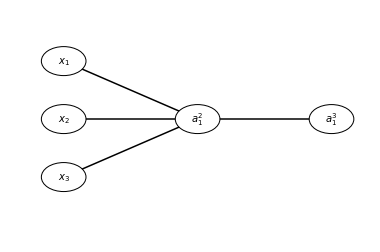

In [39]:
fig, ax = plt.subplots(1,1)
ax.axis('off')
draw_neural_net(ax, .1, .9, .1, .9, [3, 1, 1], labels=True)

The $x_i$ values are the input values, the $a^2_1$ is the "activation" at layer 2, and $a^3_1$ is the "output", or the  hypothesis, $h_{\theta}(x)$.  The "activation" is performed using the sigmoid activation function ($g(z)=\frac{1}{1+e^{-z}}$).

For a network, the representation could look something like this:

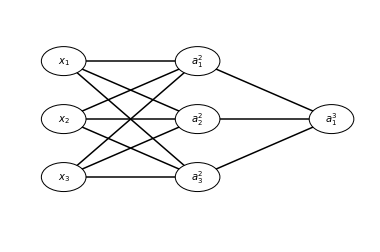

In [40]:
fig, ax = plt.subplots(1,1)
ax.axis('off')
draw_neural_net(ax, .1, .9, .1, .9, [3, 3, 1], labels=True)

This model consists of $L=3$ layers, the first ($x_i$) is the **input** layer, the second layer consists of $s_{l=2}=3$ units (or neurons) and is known as the **hidden** layer.  The third layer (the **output** layer) consists of $s_{l=3}=1$ units.  Each of the $a_i^l$ units represents the activation of unit $i$ in layer $l$, where the "activation" is the application of the sigmoid function.

#### How it works
At each layer $l$ there is a matrix of weights (or parameters), $\Theta^l$ that controls the function mapping from layer $l$ to $l+1$. So,
$$
a^2_1 = g(\Theta^1_{10}x_0 + \Theta^1_{11}x_1 + \Theta^1_{12}x_2 + \Theta^1_{13}x_3)
$$
$$
a^2_2 = g(\Theta^1_{20}x_0 + \Theta^1_{21}x_1 + \Theta^1_{22}x_2 + \Theta^1_{23}x_3)
$$
$$
a^2_3 = g(\Theta^1_{30}x_0 + \Theta^1_{31}x_1 + \Theta^1_{32}x_2 + \Theta^1_{33}x_3)
$$
and,
$$
a^3_1 = h_\Theta(x) = g(\Theta^2_{10}a^2_0 + \Theta^2_{11}a^2_1 + \Theta^2_{12}a^2_2 + \Theta^2_{13}a^2_3)
$$

The $x_0$ and $a^l_0$ terms are the bias correction terms, and are added at each layer.  If the network has $s_l$ units in layer $l$, and $s_{l+1}$ units in layer $l+1$, then $\Theta^l$ will be of dimension $[s_{l+1}, (s_l + 1)]$

#### Implementation

The neural net is implemented via forward propagation, and can be vectorised.  Generally, if $a^{(l)} = [a^{(l)}_0, a^{(l)}_1,..., a_{s_j}^{(l)}]$ and $z^{(l)} = [z^{(l)}_1,..., z_{s_l}^{(l)}]$, $a^{(l)} = g(z^{(l)})$, where $z^{(l)} = \Theta^{(l-1)}a^{(l-1)}$.  This can be thought of as the neural network learning its own features.  At this point the $\Theta$ values must be known, they are learned via the method of back-propagation.  

## Learning in a Neural Network
### Cost function
The cost function for neural networks is similar to that for the logistic regression, with the addition of a sum over the number of classes, $k$.
$$
J(\theta) = \frac{-1}{m}[\sum^m_{i=1} \sum^K_{k=1} [y_k^{(i)} log(h_{\theta}(x^{(i)})_k) - (1-y_k^{(i)}) log(1 - h_{\theta}(x^{(i)})_k)] + \frac{\lambda}{2m} \sum^{L-1}_{l=1} \sum^{S_1}_{i=1} \sum^{S_{1+1}}_{j=1}(\Theta_{ji}^l)^2
$$

### Backpropagation
To find the optimal weights (or parameters, $\Theta$) for the classification, we need to minimise the cost function over $\Theta$.  To do this we need the cost function, $J(\Theta)$, and its gradient, $\frac{\partial J(\Theta)}{\partial \Theta_{ij}}$.  The gradient is calculated via the method of back-propagation.  For the final layer ($l=L=3$), we can write (via the chain-rule):

$$
\frac{\partial J(\Theta)}{\partial \Theta^{(L-1)}} = 
\frac{\partial J(\Theta)}{\partial a^{(L)}} 
\frac{\partial a^{(L)}}{\partial z^{(L)}} 
\frac{\partial z^{(L)}}{\partial \Theta^{(L-1)}}
$$

and for the second layer (the hidden layer, $l=2$):


$$
\frac{\partial J(\Theta)}{\partial \Theta^{(L-2)}} = 
\frac{\partial J(\Theta)}{\partial a^{(L)}} 
\frac{\partial a^{(L)}}{\partial z^{(L)}} 
\frac{\partial z^{(L)}}{\partial a^{(L-1)}}
\frac{\partial a^{(L-1)}}{\partial z^{(L-1)}}
\frac{\partial z^{(L-1)}}{\partial \Theta^{(L-2)}}
$$

Generally, 

$$
\frac{\partial z^{(l)}}{\partial \Theta^{(l-1)}} = \frac{\partial (\Theta^{(l-1)}a^{(l-1)})}{\partial \Theta^{(l-1)}} = a^{(l-1)}
$$

and we set

$$
\frac{\partial J(\Theta)}{\partial a^{(L)}} 
\frac{\partial a^{(L)}}{\partial z^{(L)}}  = \delta^{(L)}
$$

and then
$$
\delta^{(L)} 
\frac{\partial z^{(L)}}{\partial a^{(L-1)}}
\frac{\partial a^{(L-1)}}{\partial z^{(L-1)}} = \delta^{(L-1)}
$$

Given that $a = g(z)$, $\frac{\partial a}{\partial z} = a(1-a)$, $\delta^{(L)}$ reduces (via some calculus and substitutions) to:
$$
\delta^{(L)} = a^{(L)} - y
$$

and, as 

$$
\frac{\partial z^{(l)}}{\partial a^{(l-1)}} = \frac{\partial (\Theta^{(l-1)}a^{(l-1)})}{\partial a^{(l-1)}} = \Theta^{(l-1)}
$$

$\delta^{(L-1)}$ reduces to:
$$
\delta^{(L-1)} = \delta^{(L)}\Theta^{(L-1)} a^{(L-1)}(1-a^{(L-1)})
$$

So, putting it all together we get (for $L=3$),
$$
\frac{\partial J(\Theta)}{\partial \Theta^{(2)}} = \delta^{(3)}a^{(2)}
$$
and,
$$
\frac{\partial J(\Theta)}{\partial \Theta^{(1)}} = \delta^{(2)}a^{(1)}
$$

Easy!  This could then be extended to networks with more layers fairly easily.